In [14]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# Load training and testing data
train_data = pd.read_csv('/content/mnist_train.csv')
test_data = pd.read_csv('/content/mnist_test.csv')


# Normalize pixel values to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0



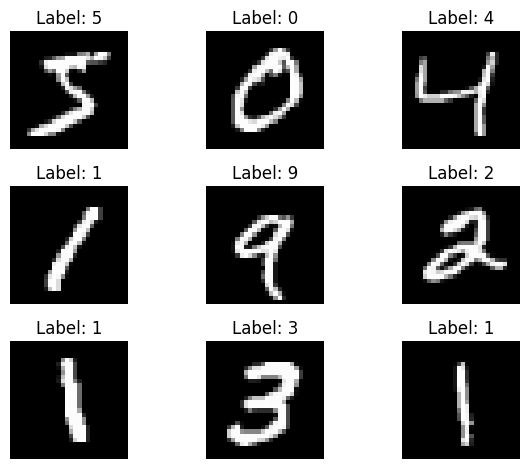

In [15]:
# Display a few sample images
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [16]:
# Create a simple MLP model
def create_mlp(hidden_layers, neurons_per_layer):
    model = Sequential([Flatten(input_shape=(28, 28))])
    for _ in range(hidden_layers):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Training model with 1 hidden layers...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Accuracy with 1 hidden layers: 0.9092

Training model with 2 hidden layers...
Accuracy with 2 hidden layers: 0.9172

Training model with 3 hidden layers...
Accuracy with 3 hidden layers: 0.9322

Training model with 5 hidden layers...
Accuracy with 5 hidden layers: 0.9349


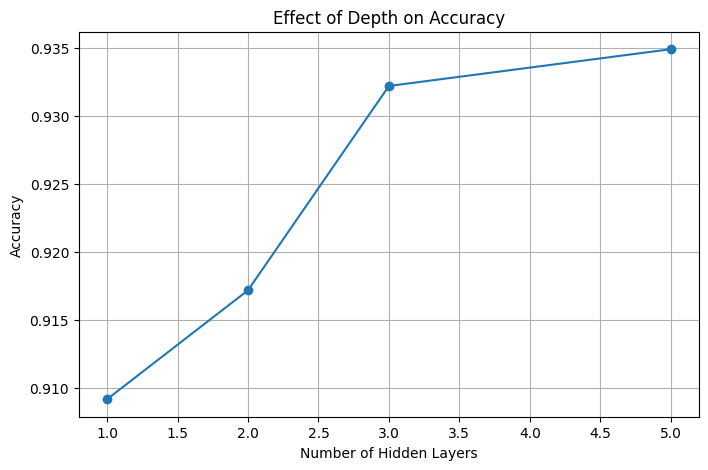

In [17]:
# Experiment with different depths
depths = [1, 2, 3, 5]
results_depth = []

for d in depths:
    print(f"\nTraining model with {d} hidden layers...")
    model = create_mlp(hidden_layers=d, neurons_per_layer=64)
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Accuracy with {d} hidden layers: {accuracy:.4f}")
    results_depth.append(accuracy)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(depths, results_depth, marker='o')
plt.title("Effect of Depth on Accuracy")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy")
plt.grid()
plt.show()



Training model with 16 neurons per layer...
Accuracy with 16 neurons per layer: 0.8583

Training model with 64 neurons per layer...
Accuracy with 64 neurons per layer: 0.9164

Training model with 128 neurons per layer...
Accuracy with 128 neurons per layer: 0.9325

Training model with 256 neurons per layer...
Accuracy with 256 neurons per layer: 0.9560


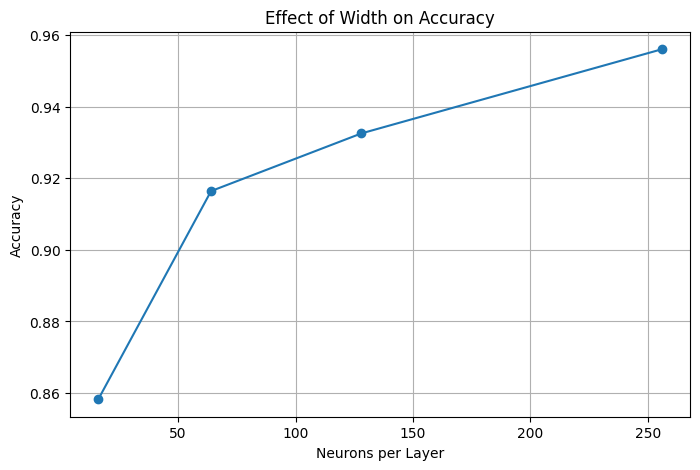

In [18]:
# Experiment with different widths
widths = [16, 64, 128, 256]
results_width = []

for w in widths:
    print(f"\nTraining model with {w} neurons per layer...")
    model = create_mlp(hidden_layers=2, neurons_per_layer=w)
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Accuracy with {w} neurons per layer: {accuracy:.4f}")
    results_width.append(accuracy)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(widths, results_width, marker='o')
plt.title("Effect of Width on Accuracy")
plt.xlabel("Neurons per Layer")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


In [19]:
from itertools import product

# Combine depth and width in a grid
depths = [1, 2, 3]
widths = [64, 128, 256]
results = []

for d, w in product(depths, widths):
    print(f"\nTraining model with {d} layers and {w} neurons per layer...")
    model = create_mlp(hidden_layers=d, neurons_per_layer=w)
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    results.append((d, w, accuracy))

# Display results in tabular format
print("\nDepth | Width | Accuracy")
print("-----------------------")
for r in results:
    print(f"  {r[0]}   |  {r[1]}   |  {r[2]:.4f}")



Training model with 1 layers and 64 neurons per layer...

Training model with 1 layers and 128 neurons per layer...

Training model with 1 layers and 256 neurons per layer...

Training model with 2 layers and 64 neurons per layer...

Training model with 2 layers and 128 neurons per layer...

Training model with 2 layers and 256 neurons per layer...

Training model with 3 layers and 64 neurons per layer...

Training model with 3 layers and 128 neurons per layer...

Training model with 3 layers and 256 neurons per layer...

Depth | Width | Accuracy
-----------------------
  1   |  64   |  0.9104
  1   |  128   |  0.9142
  1   |  256   |  0.9211
  2   |  64   |  0.9183
  2   |  128   |  0.9336
  2   |  256   |  0.9528
  3   |  64   |  0.9291
  3   |  128   |  0.9465
  3   |  256   |  0.9648
